# A regressão logística é semelhante à linear porém seu resultado é lógico 
* False/True
* Resultado apresentado por meio de porcentagem
* Pode ser simples ou múltipla

In [3]:
df = read.csv("dataset/eleicao.csv", sep=';', header=T)
head(df)

CANDIDATO,SITUACAO,DESPESAS
George Turner,0,10
Victor Johnson,0,100
Jerry Perry,1,1600
Shirley Cook,1,1500
Carolyn Bailey,1,3300
Susan Sanders,0,200


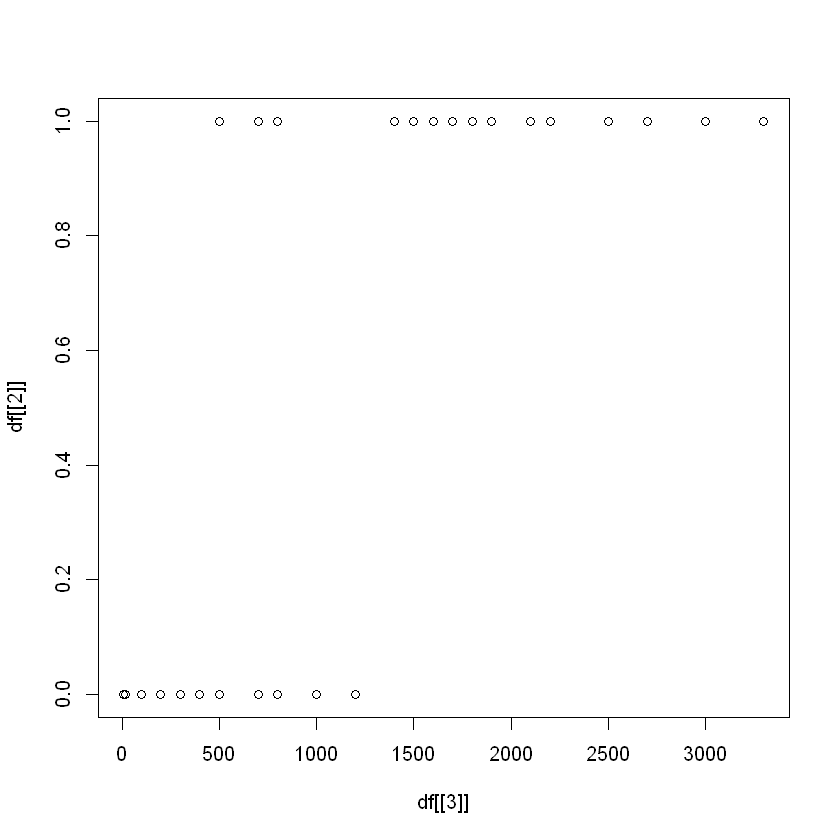

In [16]:
plot(df[[3]],df[[2]])

In [14]:
summary(df)

             CANDIDATO     SITUACAO         DESPESAS   
  Gary Peterson   : 1   Min.   :0.0000   Min.   :  10  
  Pamela Bryant   : 1   1st Qu.:0.0000   1st Qu.: 300  
 Andrea Washington: 1   Median :1.0000   Median : 800  
 Annie Brooks     : 1   Mean   :0.5106   Mean   :1086  
 Anthony Harris   : 1   3rd Qu.:1.0000   3rd Qu.:1700  
 Barbara White    : 1   Max.   :1.0000   Max.   :3300  
 (Other)          :41                                  

In [15]:
# Correlação
cor(df[[2]], df[[3]])

[1] 0.8121872

In [19]:
# Criação do modelo de Regressão Logística
## glm é uma função geral e a family que especifica a regressão logística (binomial)
mod = glm(SITUACAO~DESPESAS, data=df,family="binomial")
summary(mod)


Call:
glm(formula = SITUACAO ~ DESPESAS, family = "binomial", data = df)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-1.79020  -0.29574   0.00379   0.20326   2.10968  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -4.602880   1.315934  -3.498 0.000469 ***
DESPESAS     0.004984   0.001404   3.550 0.000385 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 65.135  on 46  degrees of freedom
Residual deviance: 18.540  on 45  degrees of freedom
AIC: 22.54

Number of Fisher Scoring iterations: 7


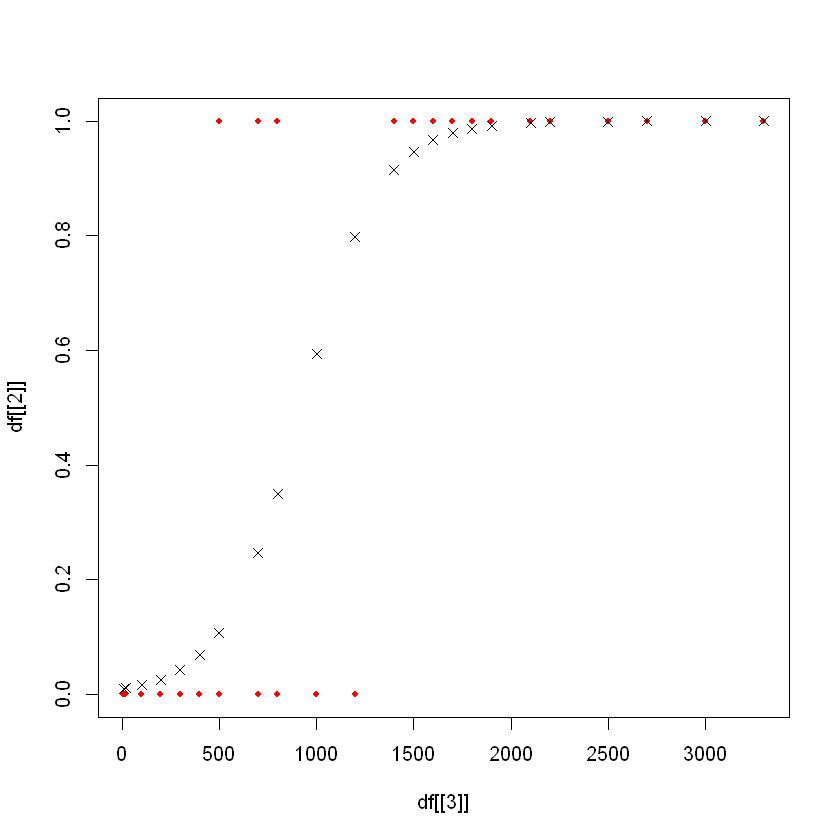

In [21]:
# Comparação entre os dados reais e o modelo ajustado
plot(df[[3]],df[[2]],col='red', pch=20)
points(df[[3]], mod$fitted, pch=4)

In [24]:
# Previsão do modelo
prev = predict(mod, newdata=df, type="response")
prev = prev >= 0.5+ para retornar verdadeiro ou falso
prev

1     2     3     4     5     6     7     8     9    10    11    12    13 
FALSE FALSE  TRUE  TRUE  TRUE FALSE  TRUE  TRUE FALSE  TRUE FALSE FALSE  TRUE 
   14    15    16    17    18    19    20    21    22    23    24    25    26 
FALSE FALSE FALSE  TRUE  TRUE FALSE FALSE  TRUE FALSE FALSE FALSE  TRUE  TRUE 
   27    28    29    30    31    32    33    34    35    36    37    38    39 
FALSE  TRUE  TRUE  TRUE FALSE FALSE  TRUE  TRUE  TRUE FALSE  TRUE  TRUE  TRUE 
   40    41    42    43    44    45    46    47 
 TRUE FALSE FALSE FALSE FALSE  TRUE FALSE FALSE

In [26]:
# Avaliação da performance/matriz de confusão
conf = table(prev, df[[2]])
conf
tx_acerto = (conf[1] + conf[4]) / sum(conf)
tx_acerto

       
prev     0  1
  FALSE 21  3
  TRUE   2 21

[1] 0.893617

In [33]:
# Carregamento de novos candidatos
df_2 = read.csv("dataset/NovosCandidatos.csv", sep=';',header=T)
df_2

CANDIDATO,DESPESAS
A,0
B,10
C,200
D,500
E,900
F,1500
G,3000


In [32]:
# Previsão: APENAS OS DOIS ÚLTIMOSCANDIDATOS SERÃO ELEITOS
prev$RESULT = predict(mod, newdata=df_2, type="response")
prev$RESULT
prev$RESULT >= 0.5

1           2           3           4           5           6 
0.009923466 0.010425261 0.026438255 0.108027149 0.470635921 0.946475247 
          7 
0.999967947

1     2     3     4     5     6     7 
FALSE FALSE FALSE FALSE FALSE  TRUE  TRUE

In [29]:
prev$RESULT

ERROR: Error in prev$RESULT: $ operator is invalid for atomic vectors
